# Python の使い方
*introduction_to_python_ad.ipynb*

A. Date 
updated 2021.5.26

ここでは，Python の使い方を『例』を使って紹介します．
まったくの初心者向けではありません．
C言語など，ほかの言語で小さいプログラムを書いたことがある人向けです．
私が担当する講義に関係する内容が，いろいろ混ざっています．

わからないことがあれば Google 検索すると，説明されているページにたどり着けます．
とは言っても，分かりやすいページに辿り着けない場合が多いです．
もっとも正確に説明しているのは『公式ドキュメント』です．
**ぜひ公式ドキュメントを読んでください**

python 公式：（if 文， for 文， 関数）
https://docs.python.org/ja/3/tutorial/controlflow.html
<br>
numpy 公式：
https://numpy.org/doc/stable/reference/generated/numpy.arange.html
<br>
matplotlib 公式：
https://matplotlib.org/contents.html

**Pythonの起動**

Linux の場合はコマンドラインから 'python' と打ち込めば，Python が起動します． この ノートブック上でその必要はありません．<br>
まずは Python を電卓のように使ってみましょう．

すぐ下の左端にある再生ボタンを押すか．shiftキーを押しながらenterキーを押すと内容が実行されます．


In [227]:
(1+2)*(3-4)*5^2

-13

あれ？  3 ✕ (-1) ✕ 25 で， -75 になるはずだったんだが...  5^2 で 5の2乗は計算できていない模様．

In [6]:
5^2

7

In [7]:
5**2

25

In [8]:
(1+2)*(3-4)*5**2

-75

In [9]:
exp(10)*log(5)*sin(0.5*pi)

NameError: ignored

↑ わざとエラーを出しました．

In [228]:
import math

In [229]:
math.exp(10)*math.log(5)*math.sin(0.5*math.pi)

35450.22912709484

今後 math モジュールは使わない．numpy モジュールを使う！！！  （なにそれ，という人は，先に進む）

In [230]:
import numpy as np

これで  numpy を np で使えるようになる． numpy を使おう．

In [231]:
np.exp(10)*np.log(5)*np.sin(0.5*np.pi)

35450.22912709484

## **速習 Python： $ f(t) = 2\sin t$ のグラフを描く** 

これが Python で数学の関数の扱う際の基本です． ここは理解してすすんでください． まずは，動かしてみる． 各行において， # より後ろはコメント．

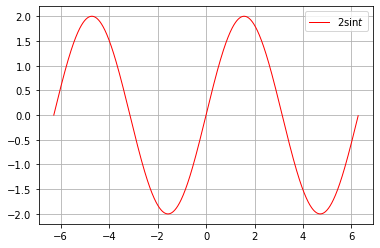

In [232]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return 2.0*np.sin(t)

dt = 0.01
start = -2.0*np.pi
end = 2.0*np.pi

# 横軸 t の作成．-6.28 から 6.28 を 0.01 おきに． t と s はベクトル（配列）．
t = np.arange(start, end, dt)
s = f(t)

# 以下の2行でデータを表示．
#for i in range(t.size): 
#  print(f'{t[i]:.5f}'+'\t'+f'{s[i]:.5f}')

fig=plt.figure(0)
plt.plot (t, s, linewidth=1.0, color="r",linestyle="solid",label="$ 2\sin t $")
plt.grid()
plt.legend()
plt.show()
fig.savefig('fig321.pdf') 

ここでは，上のコードを理解するため，次の6つについて説明．

1. np.arange
2. for 文
3. range
4. .size
5. 関数 def
6. グラフの描画

最初の3行は，最初は，おまじないと思って前へ進むのがよい．

    # -*- coding: utf-8 -*-
    import numpy as np
    import matplotlib.pyplot as plt

np.arange は，これからも，よく使う.
『例』をみれば使い方がわかる．

In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [23]:
np.arange(0.0,1.0, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.0 (start) から 1.0 (end) まで 0.1 おきに作成．  end が含まれないことに注意．

In [22]:
a = np.arange(0.0,1.0, 0.1)
print( type(a) )

<class 'numpy.ndarray'>


生成したもの（この場合は a）の型を知りたい場合． type(a) とすれば分かる．

各要素が等差数列にしたがうベクトルが生成される．
これは，**グラフを描くときなどに軸を離散化する必要があるのでよく使う．**
10から30（未満）までを5おきにであれば

In [24]:
np.arange(10,30,5) 

array([10, 15, 20, 25])

3番目の引数を省略すれば，公差は1になる．

In [25]:
np.arange(10,30)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

arrage とは別に linspace も使える．

In [26]:
np.linspace(10,30,20) 

array([10.        , 11.05263158, 12.10526316, 13.15789474, 14.21052632,
       15.26315789, 16.31578947, 17.36842105, 18.42105263, 19.47368421,
       20.52631579, 21.57894737, 22.63157895, 23.68421053, 24.73684211,
       25.78947368, 26.84210526, 27.89473684, 28.94736842, 30.        ])

これは 等間隔で20個（3番目の引数）を返してくる． こんどは最後の30が含まれている．

ここで，スライシングとよばれるものも簡単に紹介しておこう．

In [33]:
a = np.arange(10)   # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = a[3:6]  # 3 (start) から 6 (end) まで． end は含まれない．
print(b)

c = a[2:7:2]  # 2 から 7 まで 2 おきに取り出す．
print(c)

[3 4 5]
[2 4 6]


上の例で，使い方は，だいたい理解できたはず．

正確なことを知りたい場合は，『公式マニュアル』を見ればよい<br>
numpy 公式マニュアル<br>
https://numpy.org/doc/stable/reference/generated/numpy.arange.html

# **size** について

In [34]:
a = np.arange(0.0,1.0, 0.1)
print(a)
print(a.size)
print( len(a) )

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
10
10


というわけで，（変数）.size は，要素数を返してくれる．
さき走って説明すると， shape というのもある．

In [35]:
a.shape

(10,)

In [37]:
A = np.array([[1, 2], [3,4]])
print( A.shape )
print (A.size )

(2, 2)
4


## **for 文と range， print 文**

for 文は，次のような形で，よく使われる．

In [39]:
for i in range(5): 
  print(i)

0
1
2
3
4


python 公式ドキュメント：（if 文， for 文， 関数） <br>
https://docs.python.org/ja/3/tutorial/controlflow.html


## 関数の定義 def hoge:

In [41]:
def hoge(u):
  return u*u

a=3
print (hoge(a))

9


u は，関数の引数．

## **print 文**

In [44]:
a = np.arange(0.0,1.0, 0.1)
print(a)
print(f'{a[3]:.5f}') # float 型 小数点以下5桁を表示

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.30000


In [45]:
a = np.random.rand(5) # 0〜1 の一様乱数を 5 つ生成
print(a)
for i in range(a.size):
  print(f'{i}'+'\t'+f'{a[i]:.20f}')   # \t は tab， f'{} は format （C言語の printf の f）

[0.2381685  0.90029095 0.30277713 0.48859034 0.73072929]
0	0.23816850016059587514
1	0.90029095401042169566
2	0.30277713381616366828
3	0.48859034012780555578
4	0.73072928504660306093


グラフの描画について

    fig=plt.figure(0)
    plt.plot (t, s, linewidth=1.0, color="r",linestyle="solid",label="$ 2\sin t $")
    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig('fig321.pdf') 

matplotlib というのを使って描画している． 使い方は，コードを見ればだいたいはわかると思います． 説明は少し面倒なのでここでは省略．


公式ドキュメント：
https://matplotlib.org/contents.html

**そのほか，$\pi$ などの定数が使える．**

In [47]:
print( np.pi )
print( np.e )

3.141592653589793
2.718281828459045


## **そのそも C言語にある int とか double とか変数の型宣言は必要ないのか？**

自動で判別してくれる．

In [50]:
a =3
b = 2.1
c = a*b
d = np.array(34, np.float32) # もちろん型を指定することもできる．

In [51]:
print(a)
print(b)
print(c)
print(d)

3
2.1
6.300000000000001
34.0


In [52]:
print( type(a) )
print( type(b) )
print( type(c) )
print( type(d) )

<class 'int'>
<class 'float'>
<class 'float'>
<class 'numpy.ndarray'>


In [53]:
print( np.iinfo(np.int64) )
print( np.finfo(np.float32) )
print( np.finfo(np.float64) )

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
n

## **速習** Python： 微分方程式の例

$$ \frac{dx}{dt} = \exp (-3t)， x(0)=１ $$ 

まずは，動かしてみる． 各行 # より後ろはコメント．

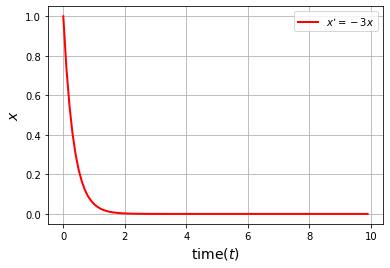

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x, t):
  return [ -3.0*x[0] ]

x0 = [1.0] # 1.0 は初期値 x(0)
t = np.arange(0, 10, 0.1) # 横軸 t の作成．0 から 10 を 0.1 おきに．t はベクトル．
x = odeint(f, x0, t)  #  x にはベクトルが返ってくる．

fig=plt.figure(0) # 以下は結果の表示
plt.plot(t, x, linewidth=2, color="red", linestyle="solid",label="$x’=-3x$")
plt.xlabel('time($t$)', fontsize=14, color='black')
plt.ylabel('$x$', fontsize=14)
# plt.xlim(-1, 5) # 表示範囲を指定したい場合
# plt.ylim(-0.5, 1.2)
plt.grid()
plt.legend()
plt.show()
fig.savefig('fig_ode101.pdf') # 図の pdf ファイルを作成

# **odeint とは**

ode (ordinary differential equations，常微分方程式) <br>
公式ドキュメント:
<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

### **ベクトルの演算，ブロードキャスト**

In [55]:
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [56]:
b = 0.5*a
print(b)

[0.5 0.5 0.5 0.5 0.5]


In [57]:
np.arange(1,1.5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4])

In [58]:
0*np.arange(1,1.5,0.1)

array([0., 0., 0., 0., 0.])

In [59]:
0*np.arange(1,1.5,0.1) + 0.5

array([0.5, 0.5, 0.5, 0.5, 0.5])

ベクトルに +0.5 とすることで， ５次元ベクトルの要素すべてに 0.5 が足されます．

In [ ]:
a = np.arange(1,1.5,0.1) # array([1. , 1.1, 1.2, 1.3, 1.4])
np.ones(a.size)

array([1., 1., 1., 1., 1.])

In [ ]:
0.5*np.ones(a.size)

array([0.5, 0.5, 0.5, 0.5, 0.5])

$ f(x) = x^2, g(x)=x^2+1 $ のグラフを描く

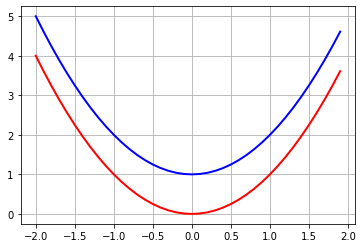

In [60]:
x = np.arange(-2, 2, 0.1) # 横軸 x の作成
f = x*x
g = x*x + 1
# print(x)

fig=plt.figure(0) # 以下は結果の表示
plt.grid()
plt.plot(x, f, linewidth=2, color="red", linestyle="solid")
plt.plot(x, g, linewidth=2, color="blue", linestyle="solid")

数学的には，おかしい （5次元ベクトルにスカラーは足せないので）．
ベクトルの要素，それぞれに 1 を足している． 
これをブロードキャスト，と言う，

In [61]:
a = np.arange(1,5,1)
print(a)

[1 2 3 4]


In [62]:
b = a + 1
print(b)

[2 3 4 5]


## **２つのベクトルの距離の計算**

In [66]:
s = np.random.randint(1,7,10) # 1 から 6 までの整数値一様乱数（サイコロを振ったときの値）を 10個生成
t = np.random.randint(1,7,10)
print(s)
print(t)
print( np.linalg.norm(s-t, ord=1) )
print( np.linalg.norm(s-t, ord=2) )

sum1 = 0
sum2 = 0
for i in range( len(s) ):
  sum1  += np.abs(s[i]-t[i])
  sum2  += (s[i]-t[i])*(s[i]-t[i])

print( sum1 )
print( np.sqrt(sum2) )

[3 2 3 5 3 2 1 3 5 1]
[5 5 6 3 6 2 3 5 6 6]
23.0
8.306623862918075
23
8.306623862918075


 乱数の使い方の公式マニュアル<br>
https://numpy.org/doc/stable/reference/random/index.html

# **ベクトル，行列の演算**

Python では，octave と同じように，
  ベクトルや行列を
  直接扱うことができる．
  線形代数を知っている人は，ちょっと戸惑う使い方を
  する場面があるが，
  「こういうふうに計算できるのか」と思って
  進むのがよい．
  まず，以下では
$$ A =
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
,~
x =
\begin{pmatrix}
5 \\
6
\end{pmatrix}
$$
として
$$ Ax =
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
\begin{pmatrix}
5 \\
6
\end{pmatrix}
=
\begin{pmatrix}
5+12 \\
15+24 
\end{pmatrix}
=
\begin{pmatrix}
17 \\
39 
\end{pmatrix}$$
を計算する例を示す．


In [67]:
A = np.array([[1, 2], [3,4]])

In [68]:
A

array([[1, 2],
       [3, 4]])

In [69]:
b = np.array([5, 6])

In [70]:
b

array([5, 6])

ちなみに，型は

In [71]:
type(A)

numpy.ndarray

In [72]:
A.shape

(2, 2)

In [73]:
b.shape

(2,)

とすれば，知ることができる．
ndarray の nd って何，とか，
(2, ~) のうしろのカンマは何，とか，
疑問はあるが，前に進もう．

In [74]:
A.dot(b)

array([17, 39])

この例でわかるように， 驚くべきことに， ベクトルに 縦ベクトルと，横ベクトルの区別が ない． 本来は，

In [75]:
b = np.array([[5], [6]])
print(b)
print(b.shape)

[[5]
 [6]]
(2, 1)


とすべきだと思うが，
そういう使い方をしているコードは，見かけない．

$$  x^{\top}A =
\begin{pmatrix}
5 & 6
\end{pmatrix}
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
=
\begin{pmatrix}
5+18 & 10+24 
\end{pmatrix}
=
\begin{pmatrix}
23 & 34 
\end{pmatrix}
$$

In [76]:
b = np.array([5, 6])

In [77]:
b.dot(A)

array([23, 34])

行列 $A$ の転置 $ A^{\top}$ は

In [78]:
print(A)
print(A.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


として求まる．
行列$A$の要素は

In [79]:
A[0,0]

1

In [80]:
A[1,0]

3

などとして求まる．
ここで添字が $0$ はじまりであることに注意．
線形代数の教科書では
  $ 
A =
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
$
としていると思うが，
ここでは
  $ 
A =
\begin{pmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{pmatrix}
$
である．
もちろん

In [81]:
A[1,1]=7

In [82]:
A

array([[1, 2],
       [3, 7]])

このように直接要素に値を代入できる．

行列については，次のような使い方をよくするので慣れておこう．
### **キーワードは，スライシングとブロードキャスト．**

In [90]:
A = np.array([[1, 2], [3,4]])
A[:,1]

array([2, 4])

`A[:,1]` は，Aの行（row）すべて，行は1行目のみ，という意味．
そもそも，行列は「たて」×「よこ」（row x column）の順に書く． (x,y) 系とは逆．

In [91]:
A[0,:]

array([1, 2])

もうすこし，大きい行列でみてみる．

In [92]:
D = np.random.rand(4,3)  # 4x3 の行列．養素は乱数．
print(D)

[[0.67276052 0.52211175 0.92945176]
 [0.91908963 0.05342306 0.15036991]
 [0.23192916 0.42795331 0.24149223]
 [0.72927882 0.2257596  0.03530658]]


次の例． D[1:3,2]  とすると， 行列 D のうち，どこが取れるか，確認しよう．

In [93]:
print( D[1:3,2] )

[0.15036991 0.24149223]


 D[1:3,2] とすると， たて（r, row）が 1から3まで（0はじまり． 3は含まれない），よこ（c, column）が 2 の部分行列をとってくることになる． これはややこしい？

In [94]:
A = np.array([[1, 2], [3,4]])
print(A[:,1])
print(A[0:2,1])    # 先の例は，これを指定したのと同じ

[2 4]
[2 4]


次は掛け算についてのコメント．

In [95]:
B = np.array([[1.0, 1.0/2.0], [1.0/3.0,1.0/4.0]])
print(A)
print(B)

[[1 2]
 [3 4]]
[[1.         0.5       ]
 [0.33333333 0.25      ]]


のとき

In [96]:
print( A*B )
print( A.dot(B) )

[[1. 1.]
 [1. 1.]]
[[1.66666667 1.        ]
 [4.33333333 2.5       ]]


となる． * を使うと，要素ごとの掛け算が求まる．

In [98]:
A = np.array([[1, 2], [3,4]])
b = np.array([1, 0])
print(A)
print(2*A)
print( b*A )
print( A*b )

[[1 2]
 [3 4]]
[[2 4]
 [6 8]]
[[1 0]
 [3 0]]
[[1 0]
 [3 0]]


In [99]:
A = np.array([[1, 2], [3,4], [5,6]] ) 
b = np.array([1, 2])
c = np.array([1, 2, 3])
c = c.reshape(-1, 1)

print(c)
print(A)
print(A*c)
print(A*b)

[[1]
 [2]
 [3]]
[[1 2]
 [3 4]
 [5 6]]
[[ 1  2]
 [ 6  8]
 [15 18]]
[[ 1  4]
 [ 3  8]
 [ 5 12]]


# **数値演算関数**

Python には数値演算のための関数が多く組み込まれている．
 例えば

In [127]:
np.cos(1/3.0*np.pi)

0.5000000000000001

$ \cos \left ( \dfrac{2}{3} \pi \right )  = \dfrac{1}{2}$なので，
ちょっと不安になるが，まあよい．
引数がベクトルや行列であれば，
要素すべての値を計算してくれる．

In [128]:
np.sin([1,2,3,4])

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [129]:
np.sin(b)

array([0.84147098, 0.90929743])

$\sin, \cos$ のほかにも，

In [130]:
np.exp(1)

2.718281828459045

In [131]:
np.log(10)

2.302585092994046

In [132]:
np.e

2.718281828459045

In [133]:
np.sqrt(3)

1.7320508075688772

など，だいたいのものはある．
各関数の説明は help(np.sqrt) 

In [134]:
help(np.sqrt)

Help on ufunc object:

sqrt = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array 

などとして参照できる．
ベクトル要素の最大値，最小値，和，積は

In [135]:
x = np.array([1, 3, 5, 2, 3])
print(x)

[1 3 5 2 3]


In [136]:
x.max()

5

一番大きい要素がどの場所（インデックス）にあるか知りたければ

In [137]:
np.argsort(x)[::-1]

array([2, 4, 1, 3, 0])

In [138]:
index = np.argsort(x)[::-1]
print( index[0])

2


In [139]:
help(np.argsort)

Help on function argsort in module numpy:

argsort(a, axis=-1, kind=None, order=None)
    Returns the indices that would sort an array.
    
    Perform an indirect sort along the given axis using the algorithm specified
    by the `kind` keyword. It returns an array of indices of the same shape as
    `a` that index data along the given axis in sorted order.
    
    Parameters
    ----------
    a : array_like
        Array to sort.
    axis : int or None, optional
        Axis along which to sort.  The default is -1 (the last axis). If None,
        the flattened array is used.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort under the covers and, in general, the
        actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stab

In [140]:
x.min()

1

In [141]:
x.sum()

14

In [142]:
x.prod()   # すべての養素の掛け算

90

として取得できる．
ほかにも

In [143]:
np.amax(x)

5

というのがある．
要素の中にひとつでもNaNが含まれている場合，
NaNが最大値として返される．
返して欲しくない場合には、nanmaxを使う．


In [144]:
A = np.array([[1, 2, 3, 4], [5,6,7,8]])
print (A)

[[1 2 3 4]
 [5 6 7 8]]


In [145]:
np.sum(A)

36

In [146]:
np.mean(A)    # 36/8 = 4.5

4.5

In [147]:
np.sum(A,axis=0) #  axis=0 は，たて方向に足す，という意味

array([ 6,  8, 10, 12])

In [121]:
np.mean(A,axis=0)

array([3., 4., 5., 6.])

In [122]:
np.mean(A,axis=1) # axis=1 は，よこ方向に平均をとる，という意味

array([2.5, 6.5])

In [123]:
np.sum(A,axis=1)

array([10, 26])

In [148]:
help(np.sum)

Help on function sum in module numpy:

sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  In 

In [149]:
a = np.array([1, 2, 3, 4, 5, 6])
print( np.mean(a) )
print( np.std(a) )
print( np.var(a) )
np.sqrt( np.var(a) )

3.5
1.707825127659933
2.9166666666666665


1.707825127659933

In [150]:
np.std(A) # A の要素の標準偏差

2.29128784747792

# 行列式，逆行列

In [151]:
A = np.array([[1, 2], [3,4]])

In [163]:
A

array([[1, 2],
       [3, 4]])

In [164]:
np.linalg.det(A)  # 行列式

-2.0000000000000004

In [165]:
B=np.linalg.inv(A) # 逆行列
print( B )

[[-2.   1. ]
 [ 1.5 -0.5]]


In [166]:
A.dot(B)  # 行列どうしの掛け算

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [156]:
B.dot(A)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

なんとも簡単に求めることができる．
次に，
行列$A$の固有値，
固有ベクトルを求めてみよう．

In [157]:
np.linalg.eig(A)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

固有値が，[-0.37228132,  5.37228132] の2つで，
それぞれの固有値に対応する固有ベクトルが，
[-0.82456484, -0.41597356],
[ 0.56576746, -0.90937671]
ということである．
固有ベクトルは，手計算だと要素が整数値でいちばん簡単なものを求めるが，ここでは長さ1に正規化されている．
ベクトル要素の平均，
標準偏差，分散は


In [158]:
x

array([1, 3, 5, 2, 3])

In [159]:
np.sum(x)/5.0

2.8

In [160]:
np.mean(x)

2.8

In [161]:
np.std(x)

1.32664991614216

In [162]:
np.var(x)

1.7600000000000005

で得られる．

In [167]:
np.sqrt( np.var(x))

1.32664991614216

たしかに標準偏差と分散の関係は成り立っている．

# 乱数の生成

まずは，
（0から1までの間の）一様乱数．

In [179]:
x = np.random.rand()

In [169]:
x

0.3321169427596461

In [180]:
x = np.random.rand(10)

In [171]:
x

array([0.84635526, 0.14919778, 0.59010431, 0.98085751, 0.48936168,
       0.08306398, 0.92136573, 0.24685704, 0.58862049, 0.71582697])

In [181]:
x = np.random.rand(2,2)

In [173]:
x

array([[0.55502829, 0.41896575],
       [0.32643495, 0.53196702]])

平均0，分散1の標準正規分布にしたがう乱数は， randn という関数を使えばよい．

In [182]:
x = np.random.randn()

In [183]:
x

1.1287774161577375

In [184]:
x = np.random.randn(10)

In [185]:
x

array([ 0.3264454 , -2.10606608,  0.94322581, -0.02317715,  0.60102107,
        1.77544399,  1.09095357, -0.16943864,  0.67038398, -0.38889882])

として生成できる．
乱数の種（seed）は

In [187]:
np.random.seed(20180822)

サンプル（標本）の平均 mean = -0.007297929046113967
サンプルの標準偏差 s.d. = 1.0077421899618473
サンプルの分散 variance = 1.0155443214291


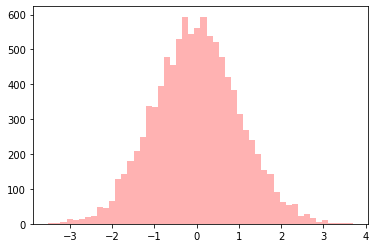

In [190]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.random.randn(10000)
print ('サンプル（標本）の平均 mean =', np.mean(x))
print ('サンプルの標準偏差 s.d. =', np.std(x))
print ('サンプルの分散 variance =', np.var(x))
 
plt.figure()
plt.hist(x, bins=50, alpha=0.3, histtype='stepfilled', color='r')
# plt.hist(x+2, bins=100, alpha=0.3, histtype='stepfilled', color='b')
plt.show()
# plt.savefig("hist101.pdf")

±1σ，±３σの意味

0.6787
0.9526
0.9971


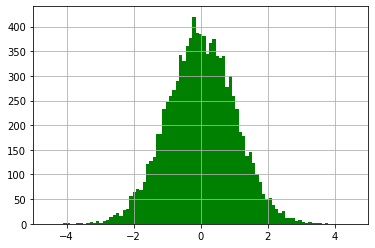

In [209]:
import numpy
import matplotlib.pyplot as plt

T = 10000
mu = 0.0
sigma = 1.0

y = []
n1=0; n2=0; n3=0
for i in range(T):
    r = np.random.randn(1)
    y.append(r)
    if r > mu - sigma and r < mu + sigma:
        n1 +=1
    if r > mu - 2.0*sigma and r < mu + 2.0*sigma:
        n2 +=1
    if r > mu - 3.0*sigma and r < mu + 3.0*sigma:
        n3 +=1

y = numpy.array(y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y, bins=101, range=(-5, 5), density=False, facecolor='g')
ax.set_xlim(-5, 5)
ax.grid(True)

print (float(n1)/float(T))
print (float(n2)/float(T))
print (float(n3)/float(T))

# plt.savefig(ss108.jpg)   # 図のファイルを作りたいとき
plt.show()

数学の試験の得点のシミュレーション（平均71.5点，標準偏差9.0点，100人）

サンプル（標本）の平均 mean = 71.55035088553103
サンプルの標準偏差 s.d. = 9.358558447631292
サンプルの分散 variance = 87.58261621773102


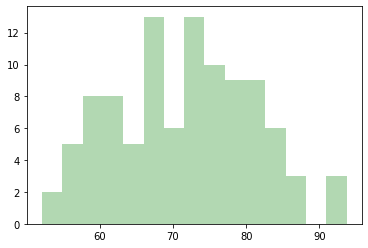

In [210]:
import numpy as np
import matplotlib.pyplot as plt

mu = 71.5
sigma = 9.0 

x = np.random.randn(100)
x = sigma*x + mu

print ('サンプル（標本）の平均 mean =', np.mean(x))
print ('サンプルの標準偏差 s.d. =', np.std(x))
print ('サンプルの分散 variance =', np.var(x))
 
plt.figure()
plt.hist(x, bins=15, alpha=0.3, histtype='stepfilled', color='g')
plt.show()

# 数の並べかえ

In [211]:
x = np.random.randn(10)
print(x)

[ 1.58921365  0.9224278   1.25992032  0.17959437  2.01645415  1.35761904
  0.38941457 -0.17919148  0.94922629 -0.1407757 ]


In [212]:
np.sort(x)

array([-0.17919148, -0.1407757 ,  0.17959437,  0.38941457,  0.9224278 ,
        0.94922629,  1.25992032,  1.35761904,  1.58921365,  2.01645415])

In [213]:
np.argsort(x)

array([7, 9, 3, 6, 1, 8, 2, 5, 0, 4])

# グラフ描画関数

Python の matplotlib には，
 グラフ作成のための関数が多数準備されている．
まず，matplotlib.pyplot を plt で呼び出せるようにしておく．

In [214]:
import matplotlib.pyplot as plt

まずは，
$ y = \sin x $ のグラフから．

In [215]:
x = np.arange(-2, 2, 0.1)

In [216]:
y=np.sin(x)

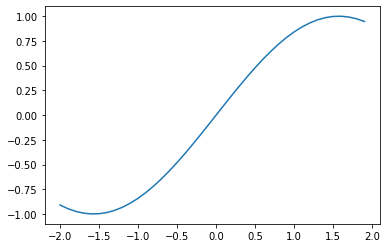

In [217]:
plt.plot(x, y)

本来は plt.show() を入力しなければ，グラフは描かれない

ヒストグラムは

In [218]:
x = np.random.randn(1000)  # 標準正規分布にしたがう乱数を1000個生成

(array([  1.,   1.,   6.,  12.,  15.,  40.,  54.,  75.,  90., 129., 145.,
        121., 108.,  92.,  45.,  38.,  13.,   7.,   6.,   2.]),
 array([-3.45615978, -3.12762309, -2.79908639, -2.4705497 , -2.14201301,
        -1.81347632, -1.48493962, -1.15640293, -0.82786624, -0.49932954,
        -0.17079285,  0.15774384,  0.48628054,  0.81481723,  1.14335392,
         1.47189061,  1.80042731,  2.128964  ,  2.45750069,  2.78603739,
         3.11457408]),
 <a list of 20 Patch objects>)

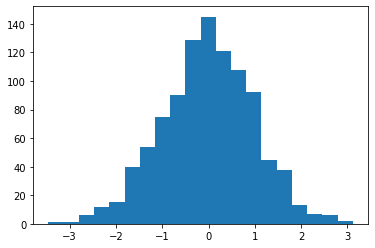

In [219]:
plt.hist(x, bins=20)  #棒の数が20本のヒストグラムを作成

で描ける．

3次元的なグラフ．

### **ここから先，工事中． きちんとできていないので注意！！！**

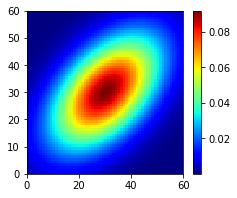

In [224]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

def g2_pdf(x,y,mu,Sigma):
    a = 1.0/(2.0*np.pi*np.sqrt(np.linalg.det(Sigma)))
    v = np.array([[x],[y]]) - mu
    retvar = a*np.exp(-1.0/2.0*(v.T).dot( (np.linalg.inv(Sigma)).dot(v) ))
    return retvar

mu = np.array([[0],[0]])
Sigma = np.array([[2,1],[1,2]]) # 分散・共分散行列

x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)
nx = len(x)
ny = len(y)
z = np.zeros((nx,ny))
for i0 in range(nx):
    for i1 in range(ny):
        z[i1,i0] = g2_pdf(x[i0],y[i1], mu, Sigma)

plt.figure(figsize=(3.5,3))
#plt.gray()
plt.jet()
plt.pcolor(z)
#plt.contour(z)
plt.colorbar()
plt.show()

これは2次元だった．こちらが3次元．

以前はうごいていたが，いまは動かない． なぜか．．．

<p>

つぎのは動かすと危険．

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def g2_pdf(x,y,mu,Sigma):
    a = 1.0/(2.0*np.pi*np.sqrt(np.linalg.det(Sigma)))
    v = np.array([[x],[y]]) - mu
    retvar = a*np.exp(-1.0/2.0*(v.T).dot( (np.linalg.inv(Sigma)).dot(v) ))
    return retvar

mu = np.array([[0],[0]])
Sigma = np.array([[2,1],[1,2]]) # 分散・共分散行列

x = np.arange(-5,5,0.2)
y = np.arange(-5,5,0.2)
nx = len(x)
ny = len(y)
z = np.zeros((nx,ny))
for i0 in range(nx):
    for i1 in range(ny):
        z[i1,i0] = g2_pdf(x[i0],y[i1], mu, Sigma)

xx,yy = np.meshgrid(x,y)
plt.figure(figsize=(5, 3.5))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot_surface(xx,yy,z,rstride=1,cstride=1,alpha=0.1,color='blue',edgecolor='black')
# ax.set_zticks((0,0.08))
ax.view_init(30,-130)
plt.savefig('fig301.eps') 
plt.show()

unix コマンドが使える．

In [226]:
!ls -l

total 500
-rw-r--r-- 1 root root 475258 May 26 02:26 fig301.eps
-rw-r--r-- 1 root root  10730 May 26 01:12 fig321.pdf
-rw-r--r-- 1 root root  13851 May 26 01:37 fig_ode101.pdf
drwxr-xr-x 1 root root   4096 May  6 13:44 sample_data


In [223]:
from google.colab import files
files.download("fig321.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 補足

ライブラリ numpy を使うには

In [ ]:
import numpy as np

などと書いてきた．

In [ ]:
import numpy

と書いた場合は，
np と省略して書いてきた部分を，
numpy と書く必要がある．
ライブラリは，他によくつかうものとして，
math がある．
numpy にも math にも，cos() という関数（メソッド名）がある．

In [ ]:
from numpy import sin, cos

In [ ]:
from numpy import *

と書くと，
numpy のすべての関数が使えるようになる．

# digit.mat （パターン認識の講義用です）

digit.mat ファイルを google colaboratory の中で使えるようにアップロードしておく．digit.mat には 16 x 16 ピクセルのモノクロの手書き数字画像が 1文字あたり500枚用意されている．

digit.mat って何？ という場合は，ここはスキップ．


In [ ]:
from google.colab import files
f= files.upload()

Saving digit.mat to digit.mat


In [ ]:
import scipy.io
data = scipy.io.loadmat("digit.mat")
type(data)

dict

In [ ]:
type(data["X"])

numpy.ndarray

In [ ]:
x = data["X"]

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(256, 500, 10)

これを (256,5000, 16,16) につくりかえる．

In [ ]:
[d, n, nc] = x.shape
z = x.reshape(d, n*nc)
z.shape # (256, 5000)

(256, 5000)

# sklearn を使えるようにするためには．

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X = digits.data
y = digits.target
images = digits.images
type(digits)

sklearn.utils.Bunch

In [ ]:
type(images)

numpy.ndarray

In [ ]:
images.shape

(1797, 8, 8)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import pandas as pd
digits_data = datasets.load_digits()
digits_df = pd.DataFrame(digits_data.data)
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


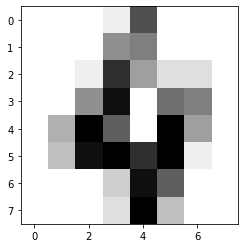

In [ ]:
plt.imshow(digits_df.loc[4,:].values.reshape(8,8), cmap=plt.cm.gray_r)

### これから追加して説明したいこと